<a href="https://colab.research.google.com/github/CristianSalgado1/AnalisisyVisualizacion/blob/master/death_cross_btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install defi

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 256kB 23.3MB/s 
  Created wheel for defi: filename=defi-1.0.15-cp37-none-any.whl size=10400 sha256=cd7963117dc2a3ce4f23aef25d77a812b6b46015cd9f11a13af604c6f6c1071d
  Stored in directory: /root/.cache/pip/wheels/a6/09/76/b7f7c95d8d51268781b01d7c2be23561469f5fc40fd0f56c19
Successfully built defi


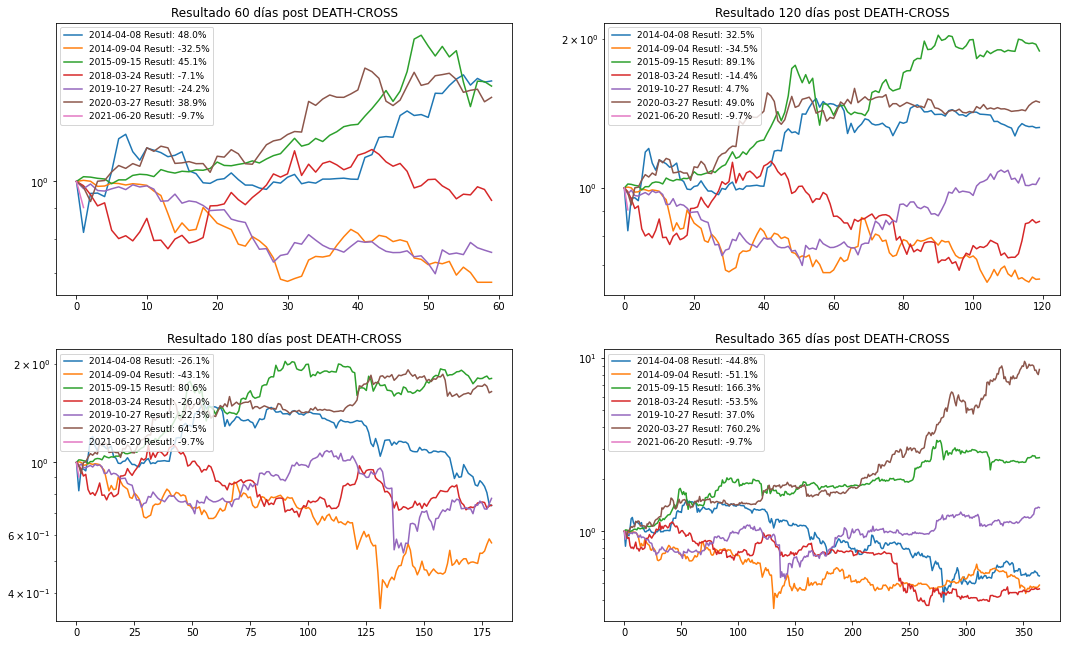

In [ ]:
from defi import defi_tools as dft
import numpy as np
import matplotlib.pyplot as plt

t = [60,120,180,365]  # Dias post death_cross a evaluar
data = dft.geckoHistorical('bitcoin')
data['cruce'] = data.price.rolling(50).mean()/data.price.rolling(200).mean()
data['cruce_death'] = np.where((data.cruce < 1) & (data.cruce.shift() > 1), 1, 0)
cruces = data.loc[data.cruce_death==1].index.values
fig, ax = plt.subplots(figsize=(18,11), ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        for fecha in cruces:
            next_values = data.loc[data.index > fecha].iloc[:t[row*2+col]]
            walk = (next_values.price.pct_change()+1).cumprod().reset_index(drop=True)
            walk[0]=1
            res = walk.iloc[-1]-1
            walk.plot(logy=True, label=f"{fecha.astype(str)[:10]} Resutl: {res:.1%}", ax=ax[row][col])
            ax[row][col].set_title(f'Resultado {t[row*2+col]} días post DEATH-CROSS')
            ax[row][col].legend(loc='upper left', fontsize=9)